<a href="https://colab.research.google.com/github/RoshanAcharya11/Foundationofdatascience/blob/main/HIT140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Topic of Investigation
# - Does Bat see Rats only as a food competitor? or also as a predator?
# - If Bat thinks rat as predators, will they show any more avoidance?
# Note: The entire question revolves around how Bat conceives Rats regarding food or predatorial danger

#Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu

# used for uploading files
# from google.colab import files
# uploaded = files.upload()

# Loading datasets
bat_datas = pd.read_csv ("dataset1.csv") # info such as bat landing on food, start & end of rat period, risk, reward etc
rat_datas = pd.read_csv ("dataset2.csv") # info such as bat landing number, food availability, rat minutes, rat arrival number

# Printing first 10 values from bat and rat
print(bat_datas.head(10))
print(rat_datas.head(10))

print(bat_datas[["bat_landing_to_food", "seconds_after_rat_arrival"]].isna().sum())
print("\n All bat datas before cleaning:", len(bat_datas))
bat_datas=bat_datas[bat_datas["bat_landing_to_food"] < bat_datas ["bat_landing_to_food"].quantile(0.99)]
print("All bat datas after removing the unclear values:", len(bat_datas))

# Feature engineering
bat_datas["rats_close"]=0
for index in bat_datas.index:
  Sec = bat_datas.at[index, "seconds_after_rat_arrival"]
  if pd.notna(Sec) and 0 <= Sec <= 300:
    bat_datas.at[index, "rats_close"]=1

print("\n Rat presence column check(first 1- rows): ")
print(bat_datas[["seconds_after_rat_arrival", "rats_close"]].head(10))

# Implementing descriptive analysis
risk_table = pd.crosstab(bat_datas['risk'], bat_datas["rats_close"])
print("\n Table of Risk Vs Rats close: \n", risk_table)

reward_table = pd.crosstab(bat_datas["reward"], bat_datas["rats_close"])
print("\n Table of Reward vs Rats close:\n", reward_table)

print("\n Hesitation time by behavior type: \n", bat_datas.groupby("habit")["bat_landing_to_food"].describe())

# Implementing inferential analysis

# Risk vs rats -> Chi-square
chi, p_val, _, _ = chi2_contingency(risk_table)
print("\n Test for Risk and Rats (Chi-square p-value): ", p_val)

#Reward vs rats -> chi-square
chi2, p_val, _, _ = chi2_contingency(reward_table)
print("Test for reward and rats(Chi-square p-value): ", p_val)

#Hesitation time vs rats -> Mann-Whitney U
hesitation_with_rats = bat_datas[bat_datas["rats_close"] == 1] ["bat_landing_to_food"]
hesitation_without_rats = bat_datas[bat_datas["rats_close"] == 0] ["bat_landing_to_food"]

if len(hesitation_with_rats) > 0 and len(hesitation_without_rats) > 0:
  u_stat, u_pval = mannwhitneyu(hesitation_with_rats, hesitation_without_rats, alternative="two-sided")
  print("Test for hesitation time (Mann-WHitney p-value):", u_pval)
else:
  print("Hesitation test skipped: insufficient groups")

         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
5  30/12/2017 19:54            24.000000   rat  30/12/2017 19:50   
6  30/12/2017 19:54            13.000000   rat  30/12/2017 19:50   
7  26/12/2017 21:24            15.000000   rat  26/12/2017 21:22   
8  26/12/2017 21:24             6.000000  pick  26/12/2017 21:22   
9  26/12/2017 21:24             3.000000  fast  26/12/2017 21:22   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                   

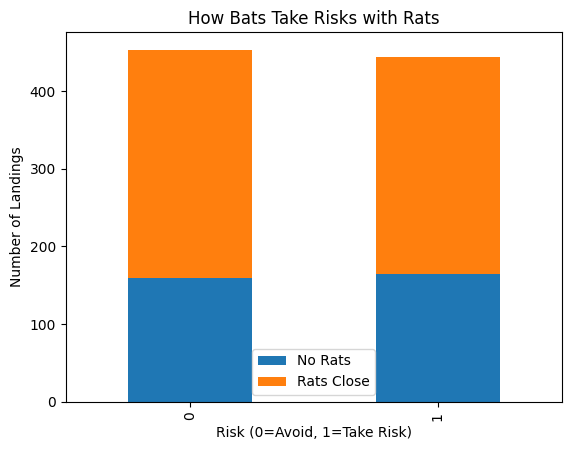

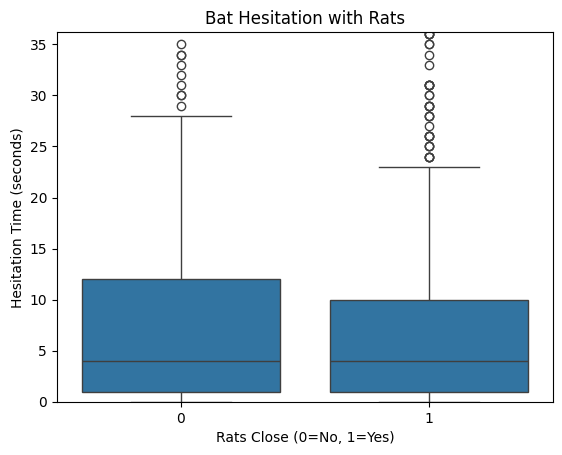

In [ ]:

import pandas as pd # Library to handle datasets(table)
import matplotlib.pyplot as plt # both matplotlib & seaborn are used to make plots/graphs
from scipy.stats import chi2_contingency, mannwhitneyu
import os
from google.colab import drive
import seaborn as sns


bat_datas = pd.read_csv("dataset1.csv") # reading bat related data
rat_datas = pd.read_csv("dataset2.csv") # rat related data

bat_datas = bat_datas[bat_datas["bat_landing_to_food"] < bat_datas["bat_landing_to_food"].quantile(0.99)]

# Add a column for rats that are close (1 = yes, 0 = no).
bat_datas["rats_close"] = 0
for index in bat_datas.index:
    seconds = bat_datas.at[index, "seconds_after_rat_arrival"]
    if pd.notna(seconds) and 0 <= seconds <= 300:
        bat_datas.at[index, "rats_close"] = 1

# Table for risk vs. rats
# risk_table = pd.crosstab(bat_datas["risk"], bat_datas["rats_close"])
# print("Table of Risk vs. Rats Close:\n", risk_table)

# # Table for reward vs. rats
# reward_table = pd.crosstab(bat_datas["reward"], bat_datas["rats_close"])
# print("\nTable of Reward vs. Rats Close:\n", reward_table)

# # Summarize hesitation time by behavior type
# print("\n Hesitation Time Based on Behavior:\n", bat_datas.groupby("habit")["bat_landing_to_food"].describe())

# Plot 1: Bar chart for risk
risk_table.plot(kind="bar", stacked=True)
plt.title("How Bats Take Risks with Rats")
plt.xlabel("Risk (0=Avoid, 1=Take Risk)")
plt.ylabel("Number of Landings")
plt.legend(["No Rats", "Rats Close"])
plt.show()

# Plot 2: Boxplot for hesitation
sns.boxplot(x="rats_close", y="bat_landing_to_food", data=bat_datas)
plt.title("Bat Hesitation with Rats")
plt.xlabel("Rats Close (0=No, 1=Yes)")
plt.ylabel("Hesitation Time (seconds)")
plt.ylim(0, bat_datas["bat_landing_to_food"].quantile(0.95))
plt.show()

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import os
from google.colab import drive

drive_path = '/content/drive/My Drive/HIT140_Assessment2/'
dataset1_path = os.path.join(drive_path, 'dataset1 (1).csv')
dataset2_path = os.path.join(drive_path, 'dataset2 (1).csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
